In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('1_workshop_data.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


In [87]:
df['Total_Sales'] = df.iloc[:, 6:].sum(axis=1)

In [88]:
df.dtypes

Rank             int64
Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total_Sales    float64
dtype: object

### 1 - How have the total sales of console games been declining over the years by different genres?

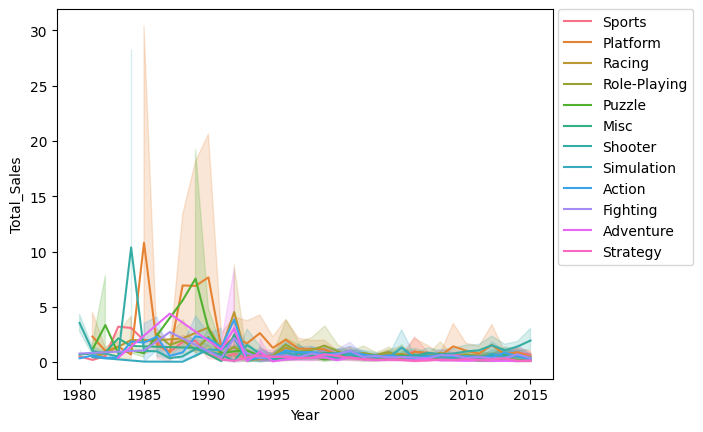

In [92]:
sns.lineplot(data=df, x="Year", y="Total_Sales", hue='Genre')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show()

### 2 - How do different platforms compare side-by-side in terms of aggregate global sales since their inceptions? Who is the leader?

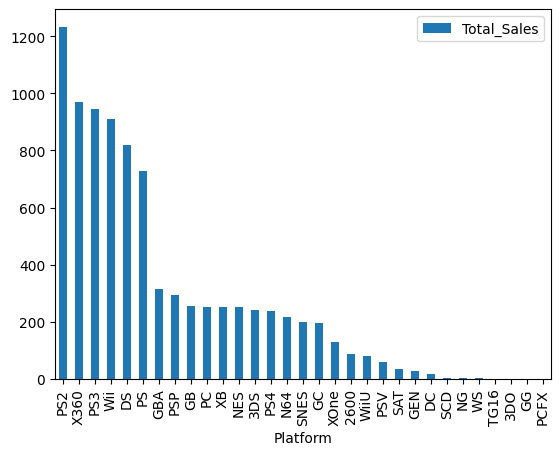

In [104]:
(df.pivot_table(index='Platform', values='Total_Sales', aggfunc=np.sum)
   .sort_values(by='Total_Sales', ascending=False)
   .plot(kind='bar'))
plt.show()

# Playstation 2 is the leader

### 3 - How do different publishers compare side-by-side in terms of aggregate global sales since their inceptions? Who is the leader?

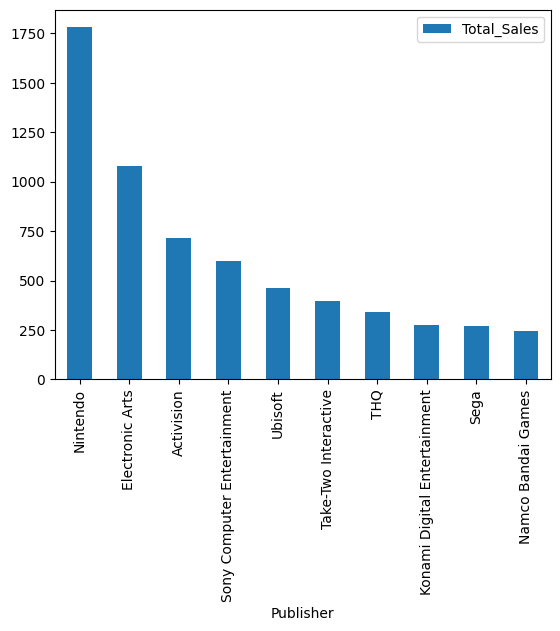

In [59]:
(df.pivot_table(index='Publisher', values='Total_Sales', aggfunc=np.sum)
   .sort_values(by='Total_Sales', ascending=False).head(10)
   .plot(kind='bar'))
plt.show()

# Nintendo

### 4 - How do the New Generation (New Gen) consoles compare in terms of total global sales for combined 2014 and 2015? New Gen platforms in this dataset are PS4, XOne and WiiU.

In [65]:
df_new = df[(df.Year>=2014) & (df.Year<=2015) & ((df.Platform=='PS4') | (df.Platform=='XOne') | (df.Platform=='WiiU'))]
df_new.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99


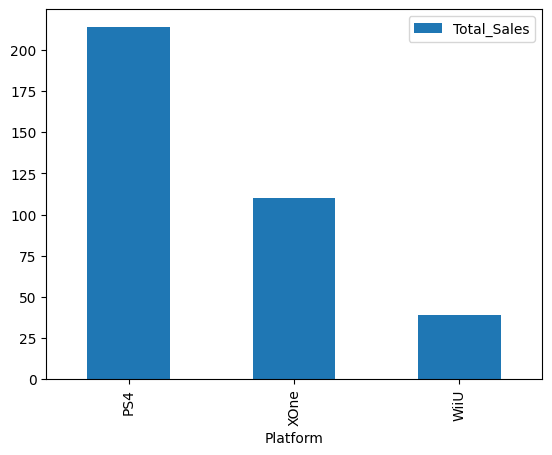

In [107]:
(df_new.pivot_table(index='Platform', values='Total_Sales', aggfunc=np.sum)
   .sort_values(by='Total_Sales', ascending=False)
   .plot(kind='bar'))
plt.show()

#### 5 - What are the top 10 game titles with the highest global sales?

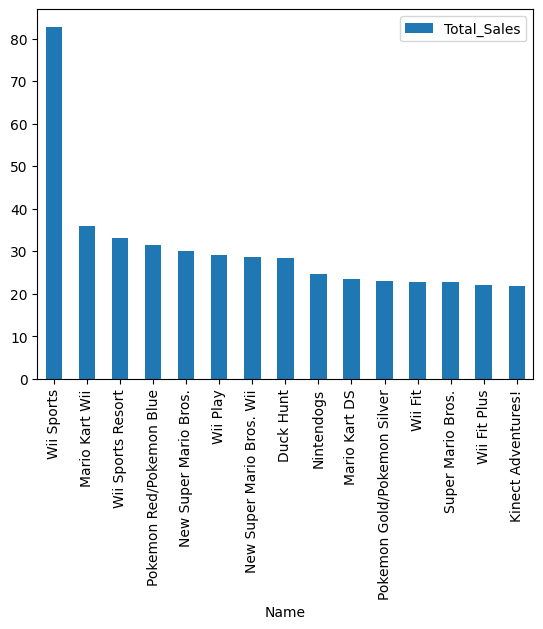

In [110]:
df.pivot_table(index='Name', values='Total_Sales').sort_values(by='Total_Sales', ascending=False).head(15).plot(kind='bar')
plt.show()